In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
file_path = '../output/matches_for_modeling.csv'
df = pd.read_csv(file_path)
df = df.dropna()
# df = df.iloc[1000:]

# Define a function to determine the xScore
def determine_xscore538(row):
    if row['prob1'] > row['prob2'] and row['prob1'] > row['probtie']:
        return 1  # team1 win
    elif row['prob2'] > row['prob1'] and row['prob2'] > row['probtie']:
        return -1  # team2 win
    else:
        return 0  # draw

df['xScore538'] = df.apply(determine_xscore538, axis=1)

df.to_csv('../output/matches_for_modeling_spi.csv', index=False)

# Drop the columns that are not needed
columns_to_drop = [
    'Game ID', 'Date', 'G Home', 'G Away', 
    'Players Found %',
    'Match Link', 'id', 'Wk', 'Day', 'Time', 'League', 'Season',
    'Home Points', 'Away Points',
    'Home', 'Away',
#      'Home Avg Points',
#        'Away Avg Points', 'Home Avg Goals For', 'Away Avg Goals For',
#        'Home Avg Goals Against', 'Away Avg Goals Against',
#        'Home Matches Played', 'Away Matches Played', 
#         'Home Points/Match','Away Points/Match', 
#         'Home Form Points', 'Away Form Points',
#        'Home Form Goals For', 'Away Form Goals For', 'Home Form Goals Against',
#        'Away Form Goals Against', 'Home Head-to-Head Points',
#        'Away Head-to-Head Points', 'Home Head-to-Head Goals For',
#        'Away Head-to-Head Goals For', 'Home Head-to-Head Goals Against',
#        'Away Head-to-Head Goals Against',
#     'Home Avg Players Score','Away Avg Players Score', 'Home Star Player Count','Away Star Player Count',
    'xG Home', 'xG Away',
    'xG Home Diff', 'xG Away Diff',
#     'home_elo', 'away_elo', 
#     'xScoreElo',
#     'xScore',
#     'xPower', 'xSuperPower',
#     'B365H', 'B365D', 'B365A',
#     'prob1', 'prob2', 'probtie',
#     'importance1', 'importance2', 
#     'proj_score1', 'proj_score2', 'spi1', 'spi2'
]

df = df.drop(columns=columns_to_drop)

# Create dummy variables for 'Home' and 'Away' columns
# df = pd.get_dummies(df, columns=['Home', 'Away'], drop_first=True)


In [102]:
df.columns

Index(['Score', 'home_elo', 'away_elo', 'B365H', 'B365D', 'B365A', 'xScore',
       'xScoreElo', 'Home Avg Players Score', 'Away Avg Players Score',
       'Home Star Player Count', 'Away Star Player Count', 'xPower',
       'xSuperPower', 'importance1', 'importance2', 'proj_score1',
       'proj_score2', 'spi1', 'spi2', 'prob1', 'prob2', 'probtie',
       'Home Avg Points', 'Away Avg Points', 'Home Avg Goals For',
       'Away Avg Goals For', 'Home Avg Goals Against',
       'Away Avg Goals Against', 'Home Matches Played', 'Away Matches Played',
       'Home Points/Match', 'Away Points/Match', 'Home Form Points',
       'Away Form Points', 'Home Form Goals For', 'Away Form Goals For',
       'Home Form Goals Against', 'Away Form Goals Against',
       'Home Head-to-Head Points', 'Away Head-to-Head Points',
       'Home Head-to-Head Goals For', 'Away Head-to-Head Goals For',
       'Home Head-to-Head Goals Against', 'Away Head-to-Head Goals Against',
       'xG Home Avg Diff', 'xG Home

In [103]:
df.describe()

,Score,home_elo,away_elo,B365H,B365D,B365A,xScore,xScoreElo,Home Avg Players Score,Away Avg Players Score,...,Away Head-to-Head Points,Home Head-to-Head Goals For,Away Head-to-Head Goals For,Home Head-to-Head Goals Against,Away Head-to-Head Goals Against,xG Home Avg Diff,xG Home Form Diff,xG Away Avg Diff,xG Away Form Diff,xScore538
count,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,...,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000,6478.000000
mean,0.111917,1688.808676,1688.664509,2.788248,4.026911,4.296485,0.286354,0.000772,75.943989,75.888279,...,1.128629,1.057328,1.132334,1.132334,1.057328,0.044466,0.039789,0.043274,0.041659,0.345940
std,0.859414,131.461179,131.579689,1.831570,1.183815,3.333744,0.954566,0.964156,4.508392,4.518752,...,1.054794,0.956245,1.018300,1.018300,0.956245,0.247575,0.464700,0.256075,0.475355,0.938247
min,-1.000000,806.760000,806.760000,1.050000,2.000000,1.140000,-1.000000,-1.000000,66.290000,66.140000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-2.100000,-2.100000,-2.900000,-2.900000,-1.000000
25%,-1.000000,1600.282500,1600.220000,1.700000,3.400000,2.300000,-1.000000,-1.000000,72.710000,72.640000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.090000,-0.260000,-0.090000,-0.260000,-1.000000
50%,0.000000,1680.220000,1679.435000,2.250000,3.600000,3.250000,1.000000,0.000000,74.940000,74.870000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.030000,0.000000,0.030000,0.000000,1.000000
75%,1.000000,1761.080000,1761.187500,3.100000,4.200000,5.000000,1.000000,1.000000,78.210000,78.242500,...,2.000000,1.670000,1.800000,1.800000,1.670000,0.160000,0.320000,0.170000,0.320000,1.000000
max,1.000000,2088.260000,2090.140000,19.000000,15.000000,34.000000,1.000000,1.000000,89.000000,88.930000,...,3.000000,9.000000,8.000000,8.000000,9.000000,2.700000,2.700000,3.550000,3.550000,1.000000


In [111]:
# Calculate accuracy of benchmark prediction
accuracy_bet = (df['Score'] == df['xScore']).mean()
accuracy_538 = (df['Score'] == df['xScore538']).mean()
accuracy_elo = (df['Score'] == df['xScoreElo']).mean()

print("Benchmark Accuracies:")
print(f"Bet Accuracy: {accuracy_bet:.2f}")
print(f"FiveThirtyEight Accuracy: {accuracy_538:.2f}")
print(f"Elo Accuracy: {accuracy_elo:.2f}")

Benchmark Accuracies:
Bet Accuracy: 0.50
FiveThirtyEight Accuracy: 0.53
Elo Accuracy: 0.50


In [110]:
# RF

# Separate features and target
X = df.drop('Score', axis=1)
y = df['Score']

# Split the data by using the last 20% as test data
train_size = int(0.8 * len(df))
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.51


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic Regression

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the Linear Regression model
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = lr_model.predict(X_test_scaled)

lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


In [113]:
# SVM
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Using radial basis function (RBF) kernel
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.53


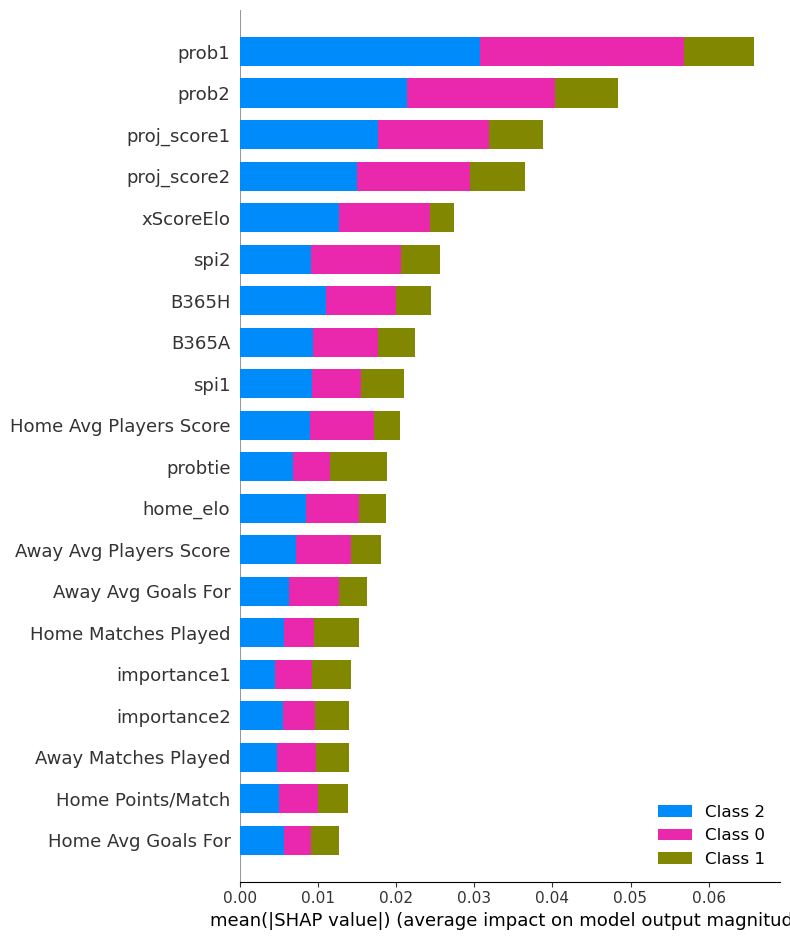

In [90]:
import shap
shap.plots.initjs()

# Create a SHAP explainer
explainer = shap.TreeExplainer(clf)

# Use shap.sample() to reduce the data size
X_sampled = shap.sample(X_test, 50)  # For example, take 100 random samples
shap_values = explainer.shap_values(X_sampled)
# shap.summary_plot(shap_values[0], X_sampled)

shap.summary_plot(shap_values, X_sampled, plot_type="bar")

# Plot SHAP force plot for the first prediction
# shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_sampled.iloc[0])